# Bibliotecas:

In [259]:
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import codecs

# Exercicio 3:
##### Criar uma função que recebe o nome do arquivo de dado como argumento e retorne: a latitude e longitude da estação; o nome da primeira cidade mais próxima da estação de medida (nearby cities).

In [260]:
def localização(arquivo):
    
# Retirando a latitude e longitude 
    texto = codecs.open (arquivo, 'rb', encoding='utf-8')
    lat_long = texto.readlines()[4][1:].strip()

# Retirando o nome das cidades proximas
    texto = codecs.open (arquivo, 'rb', encoding='utf-8')
    
    citys_nearby = texto.readlines()[35][19:-1]
    lista_cidades = citys_nearby.split(",")
    city_nearby = lista_cidades[0]
    
    return (lat_long , city_nearby)

In [261]:
localização(teste)

('23.31 S, 42.82 W', 'Rio de Janeiro')

# Exercício 4:

#### (Criar uma função que recebe o nome do arquivo de dado como argumento e retorne: um numpy array da temperatura anual estimada, que será a soma da temperatura absoluta estimada (retirar do cabeçalho do arquivo) com a anomalia anual.)

In [262]:
def tem_estimada(arquivo_dados):

# Temperatura anual estimada
    abs_anual = open(arquivo_dados)
    linha = abs_anual.readlines()[47].split()
    temp_abs_anual = np.array(linha[8:9])
    temp_final = temp_abs_anual[0]
    
# Tabela com as anomalias anuais
    tabela = np.loadtxt (arquivo_dados, comments="%")
    anual_anomaly = tabela[:,4]
    anomaly_final = np.array(anual_anomaly)
    
# Criando uma tabela com a soma da temperatura e anomalia
    final = []
    
    for elementos in anomaly_final:
        final.append (float(elementos) + float(temp_final))
        
    temp_anual_estimada = np.array(final)
    
    return (temp_anual_estimada)

In [263]:
tem_estimada("dados/0.80S-49.02W-TAVG-Trend.txt")

array([    nan,     nan,  25.868, ...,     nan,     nan,     nan])

# Exercicio 5:
#### (Faça gráficos da temperatura anual estimada para cada estação da pasta dados referente a uma cidade (não o do Brasil todo), com o título de cada gráfico contendo a latitude e longitude. Os gráficos devem ser salvos com o nome da cidade extraída no item 3 em formato png(caso o nome seja composto, substitua os espaços por _): ex.Porto_Alegre.png.)

In [264]:
def fragmentar_dados(dados):
    
    temp_anual1 = tem_estimada(item)
    
    tabela = (np.loadtxt (dados, comments = "%"))
    anos = tabela[:, 0]
    meses = tabela[:, 1]
    ano_decimal1 = (meses - 1)/12 + anos
    anomalia_10anos1 = tabela [:,8]
    unc_10anos1 = tabela [:, 9]
    unc_95pos1 = (anomalia_10anos1 + unc_10anos1)
    unc_95neg1 = (anomalia_10anos1 - unc_10anos1)
    
    return (ano_decimal1, temp_anual1, anomalia_10anos1, unc_95pos1, unc_95neg1)

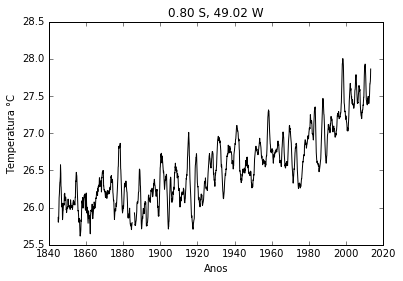

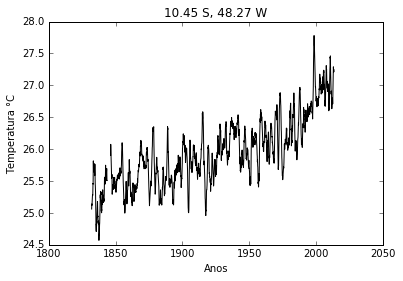

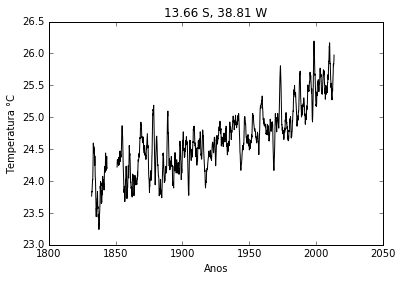

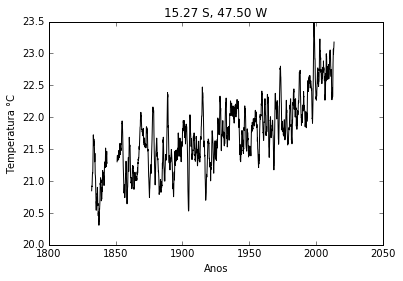

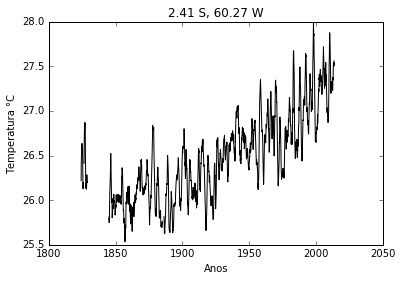

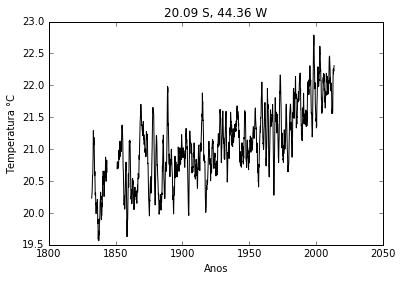

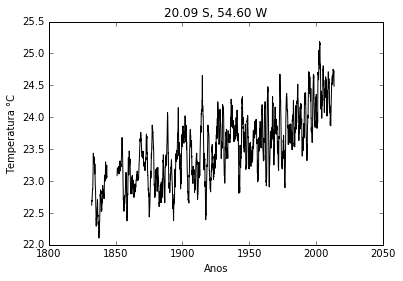

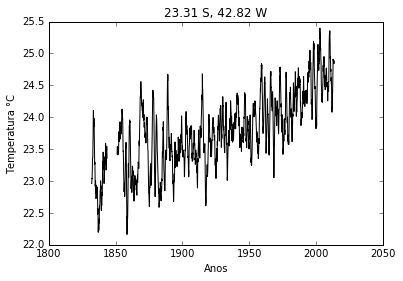

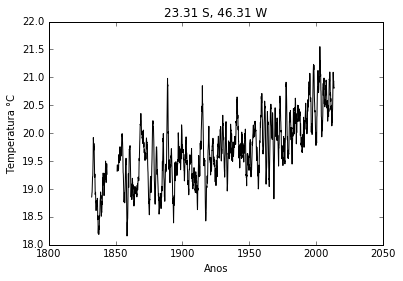

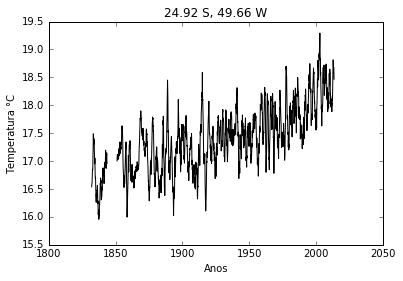

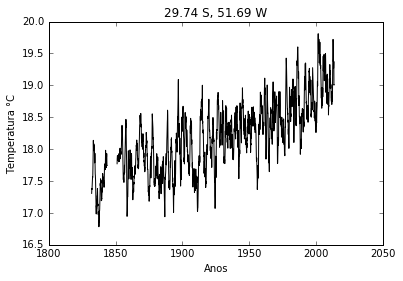

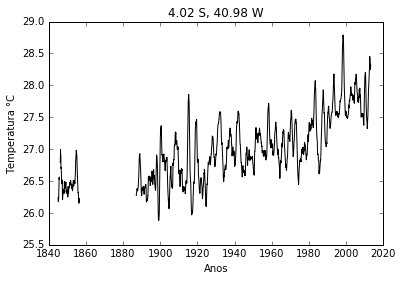

In [265]:
nome_arquivos = glob.glob("dados/*W-TAVG-Trend.txt")

#Começamos a repetição para todos os arquivos da variavel "nome_arquivos"
for item in nome_arquivos:
    
    #Primeiro de tudo, criamos as variáveis
    
    ano_decimal, temp_anual, anomalia_10anos, unc_95pos, unc_95neg = fragmentar_dados (item)
    
    lat_long , city_nearby = localização (item)
    
    nome_grafico = city_nearby.replace(" ","_")
    
    #Agora criamos o gráfico
    plt.figure()
    
    plt.plot (ano_decimal, temp_anual, c = "#000000")
    
    #Definimos os nomes de cada eixo
    plt.xlabel ("Anos")
    plt.ylabel ("Temperatura °C")
    plt.title (lat_long)

    #Finalmente salvamos a figura em formato png com o nome dos próprios arquivos que extraimos os dados, na pasta "exercicio5"
    plt.savefig ("exercicio5/" + nome_grafico + ".png", format = "png")

# Bônus:
#### (Repetir o item 5 substituindo a temperatura absoluta estimada pela mensal absoluta estimada. Atenção: nesse caso é preciso usar a anomalia mensal respectiva de cada mês (Month 1 = Jan,Month 2 = Fev etc). Para realizar essa tarefa será preciso usar condicionais (if) e loops (for).)

In [266]:
# Todas as anomalias do mes de janeiro

def valores_do_mes(num_mes, arquivo):
    
    valores_num_mes = []
    
    abrir = open(arquivo)
    numero = abrir.readlines()[51][1:].split()[(num_mes - 1)]
        
    arquivo_sem_perce = np.loadtxt(arquivo, comments= "%")
    tabela = arquivo_sem_perce[:,2][(1)::12]
        
    valores_num_mes.append ((float(numero) + tabela))
        
        
    return(valores_num_mes)

C:\Users\gleys\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


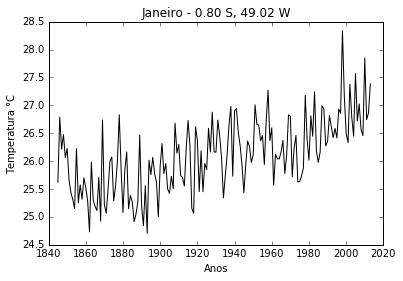

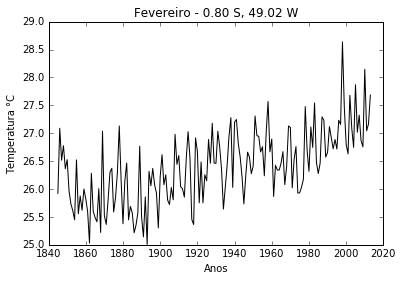

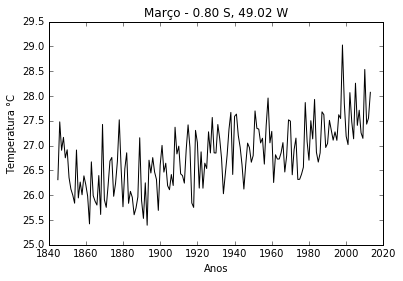

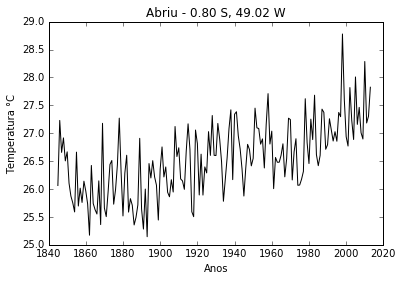

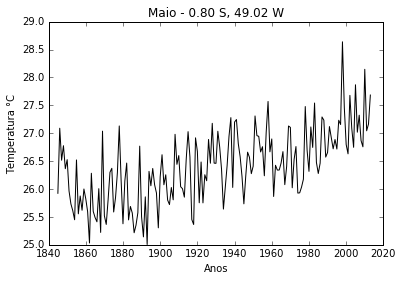

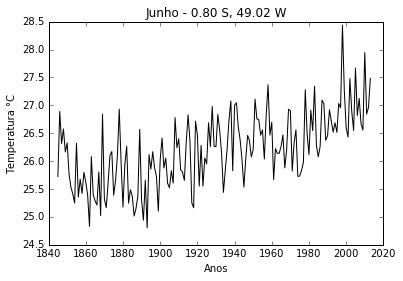

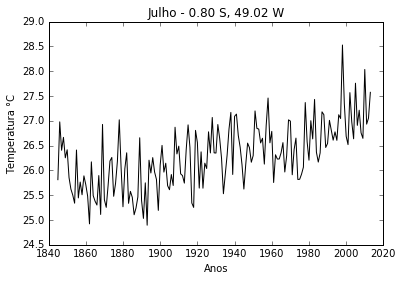

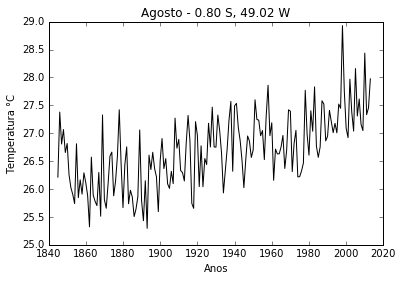

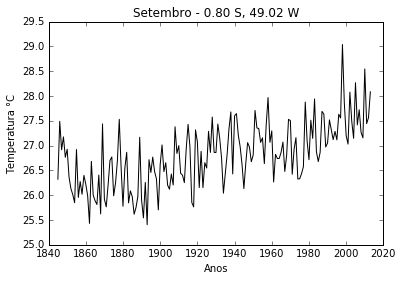

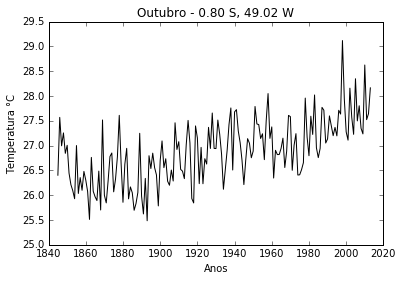

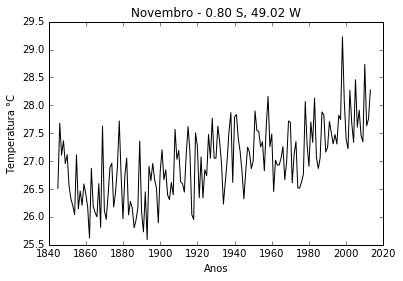

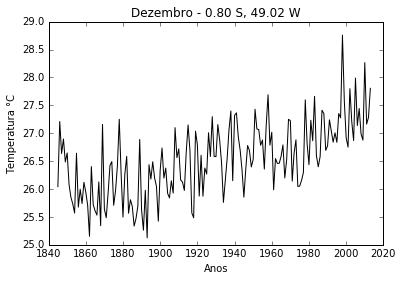

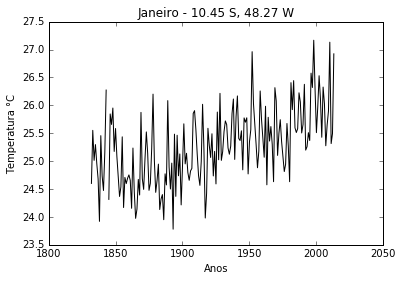

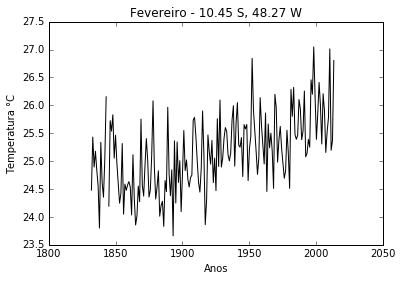

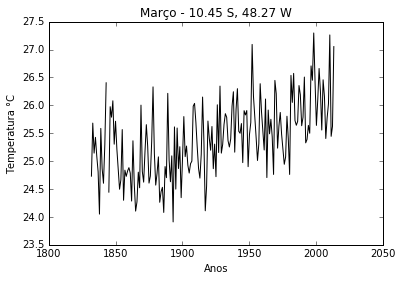

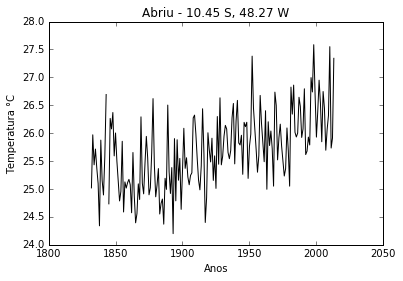

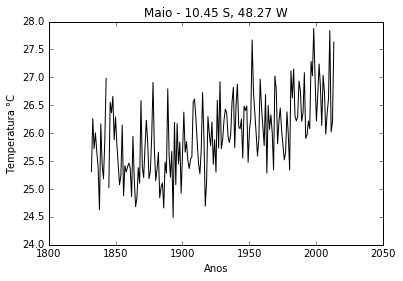

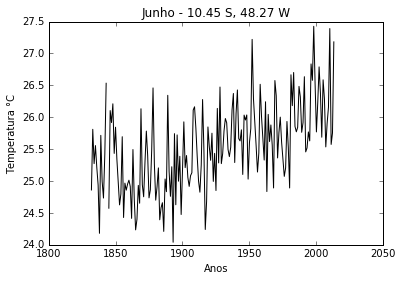

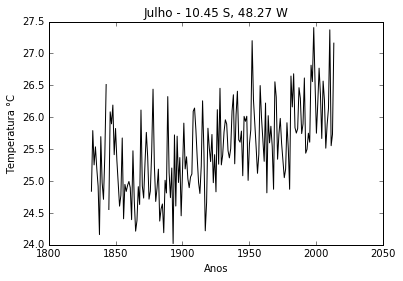

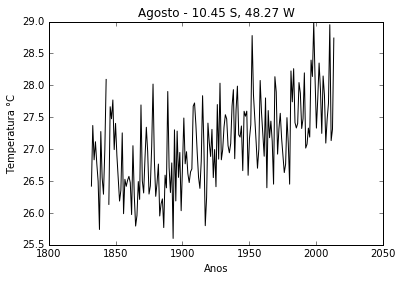

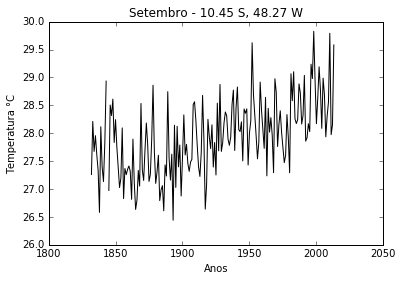

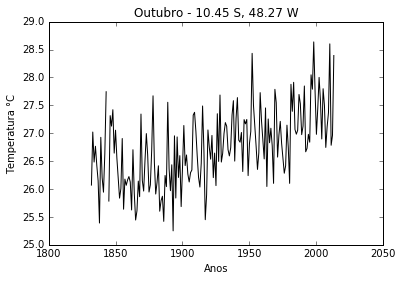

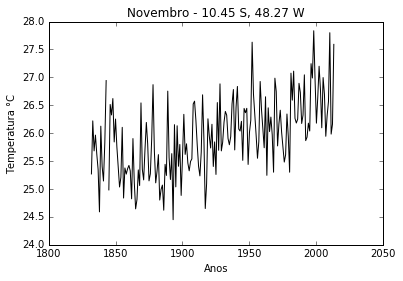

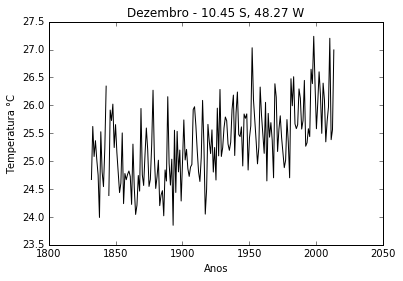

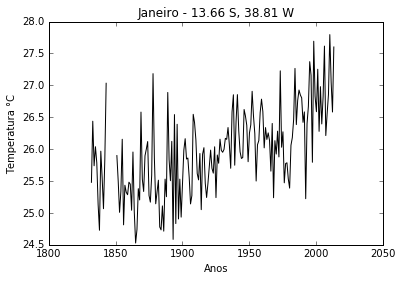

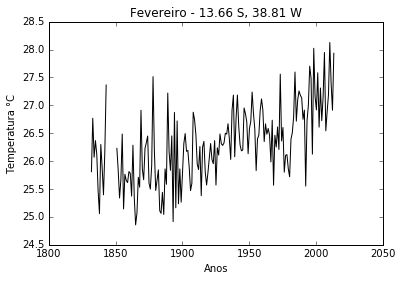

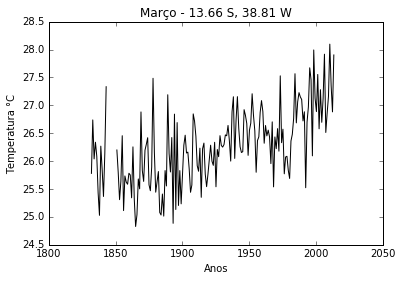

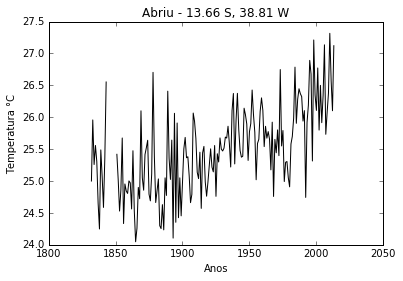

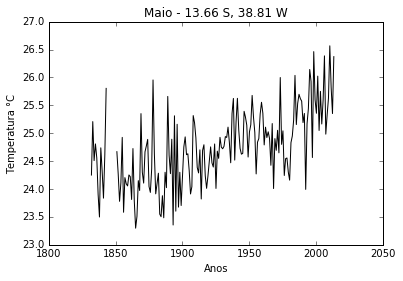

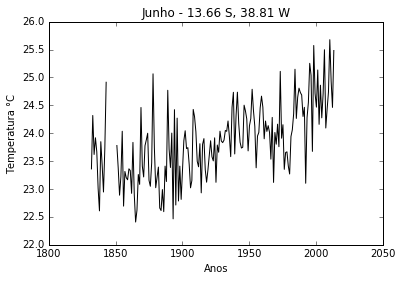

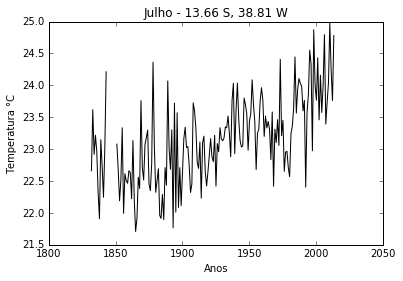

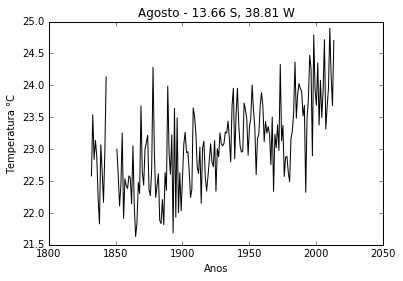

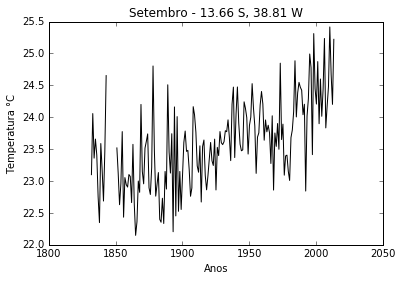

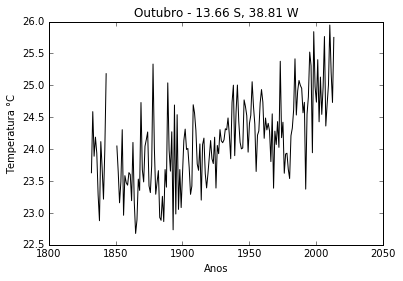

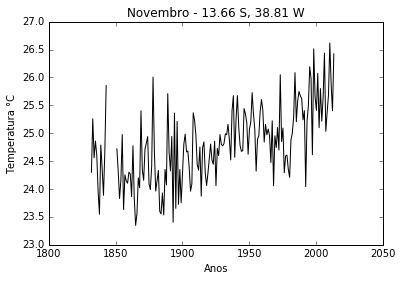

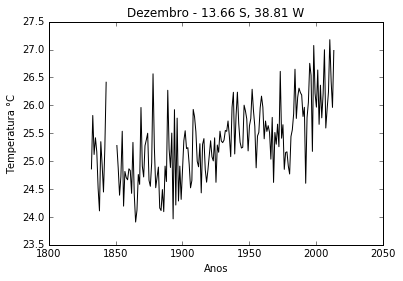

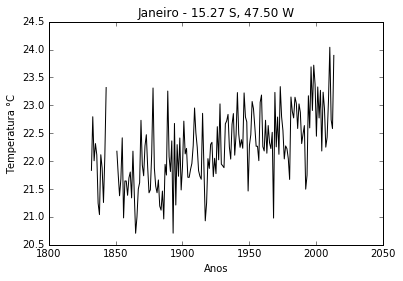

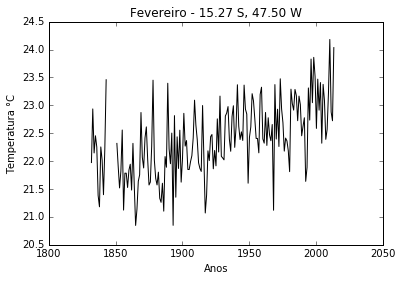

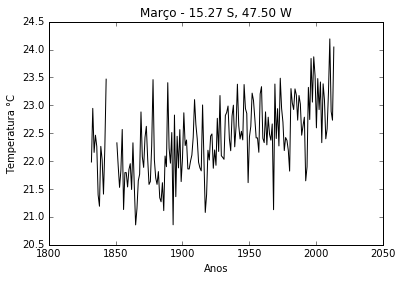

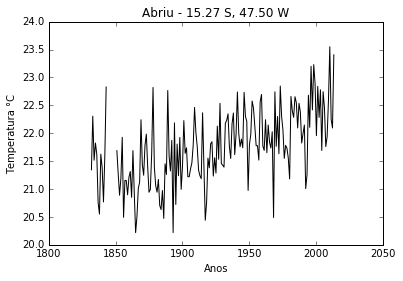

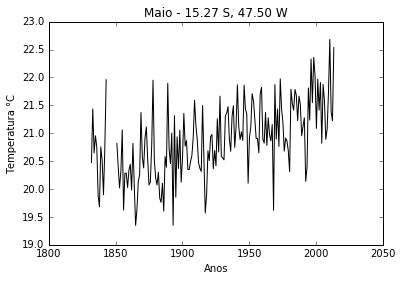

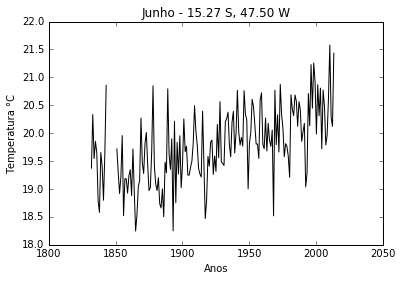

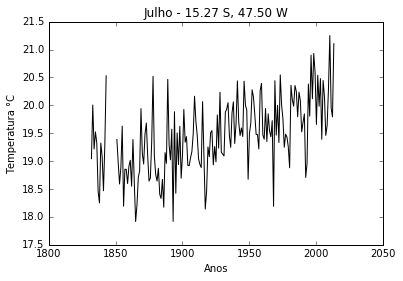

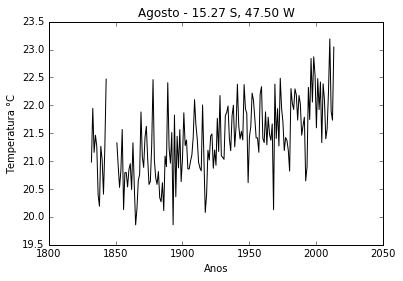

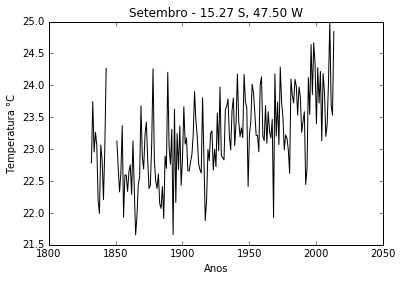

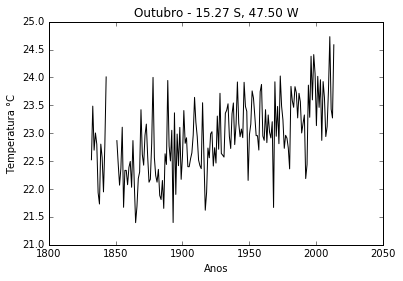

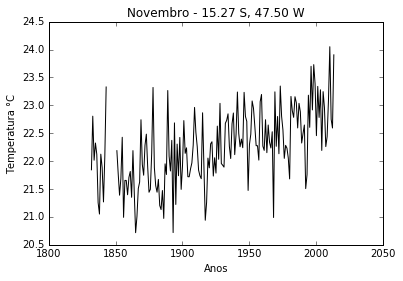

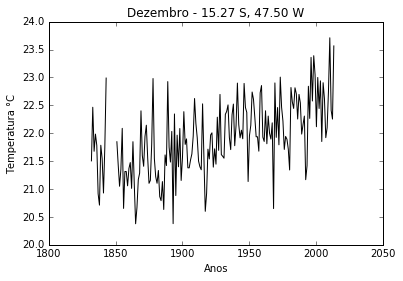

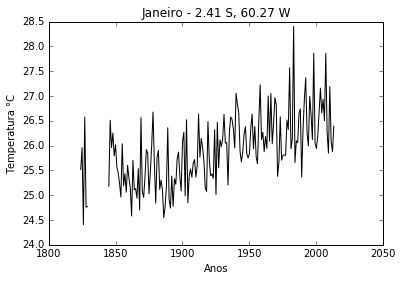

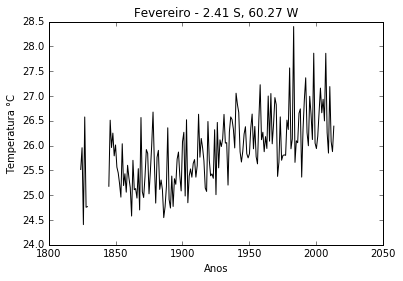

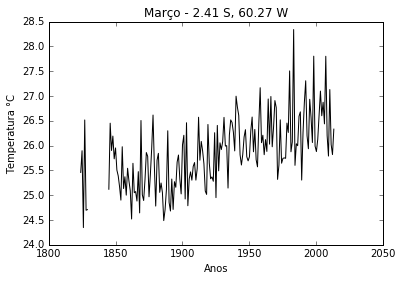

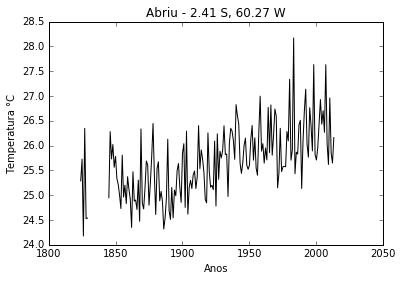

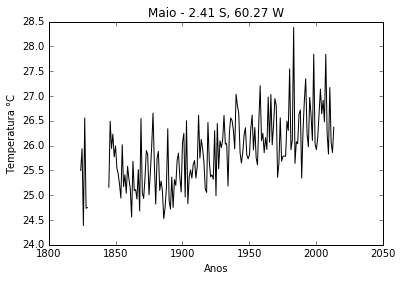

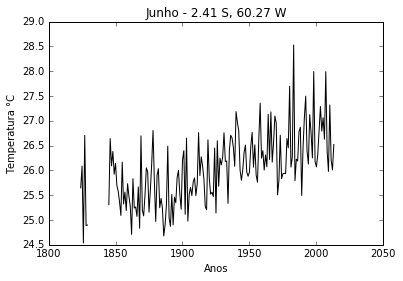

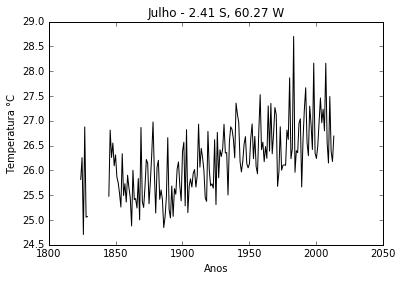

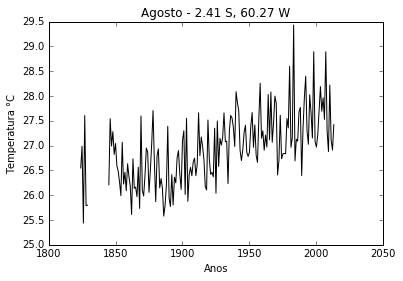

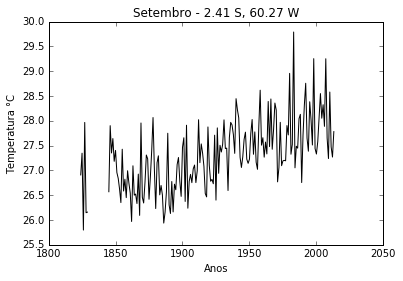

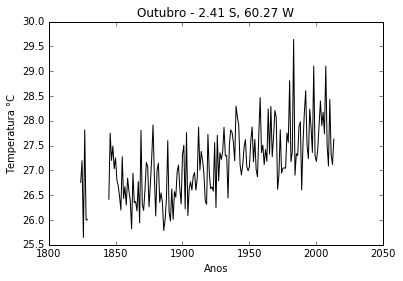

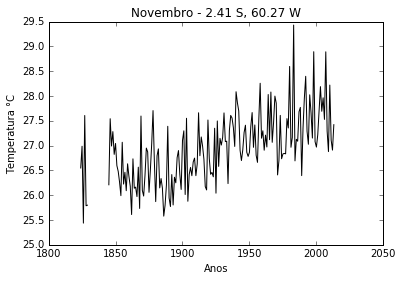

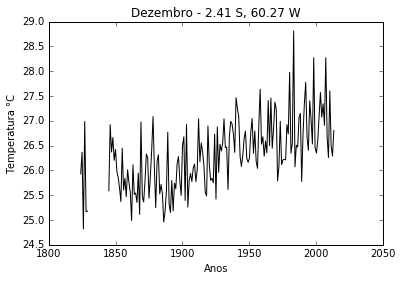

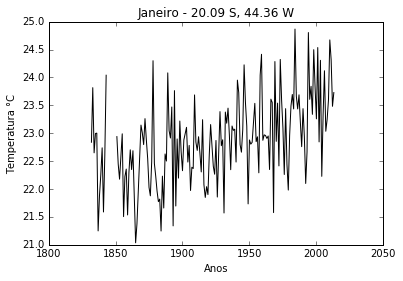

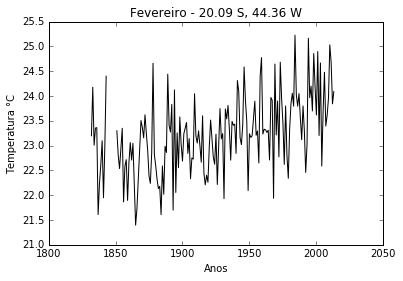

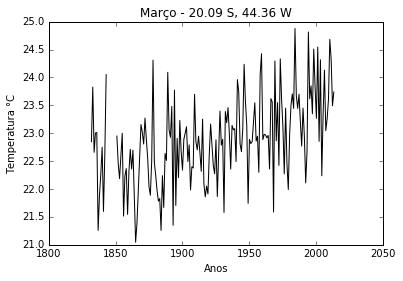

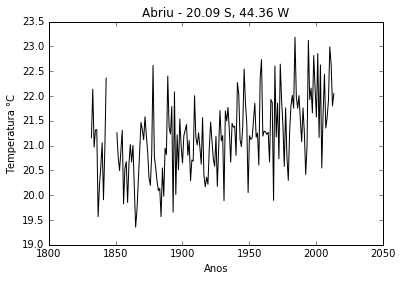

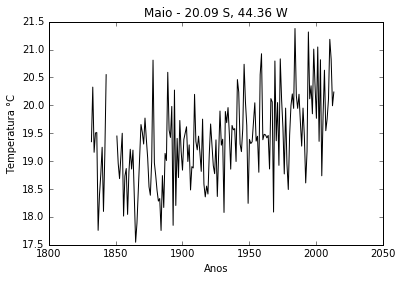

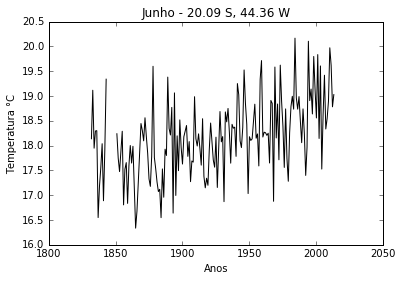

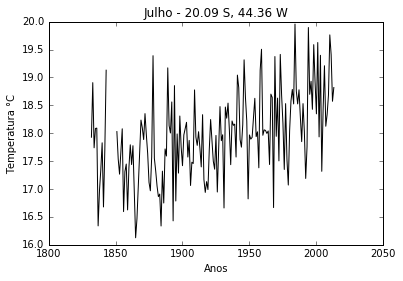

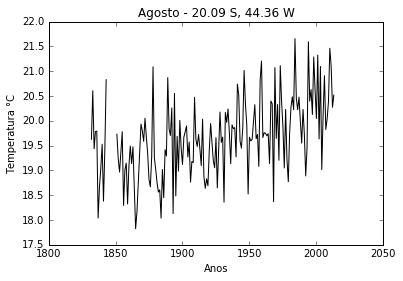

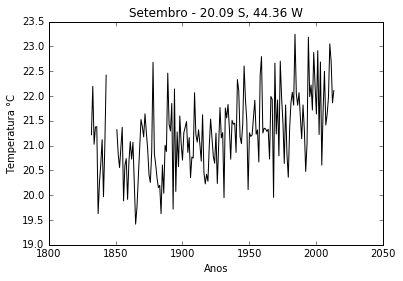

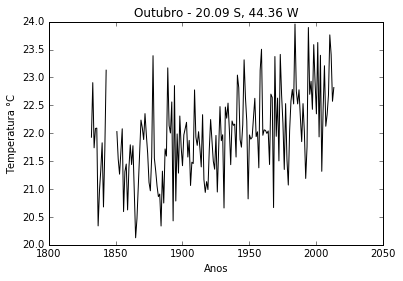

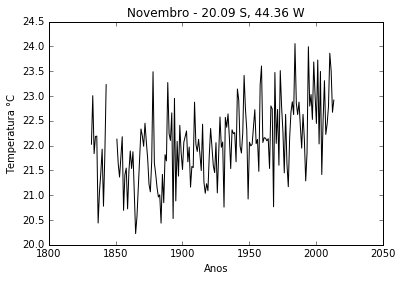

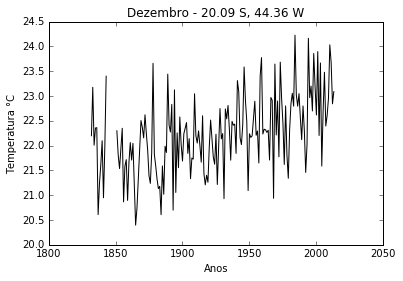

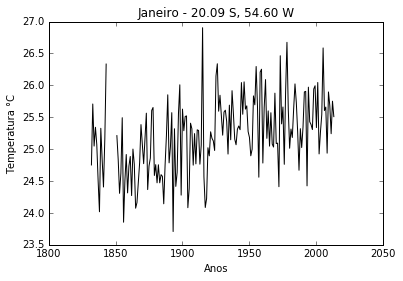

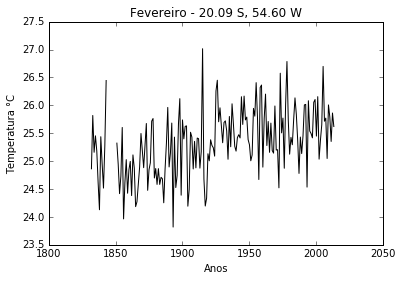

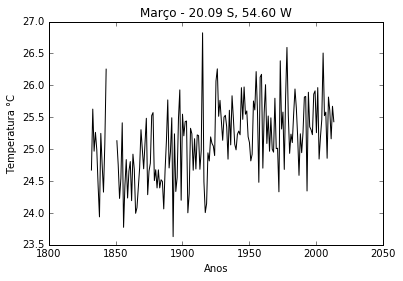

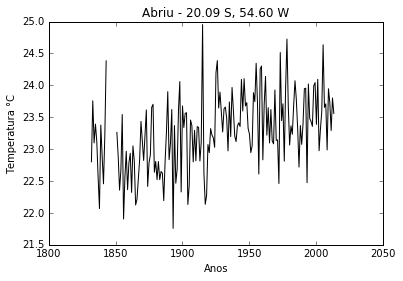

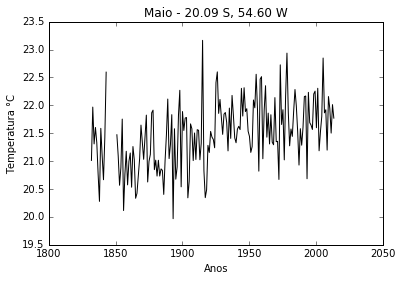

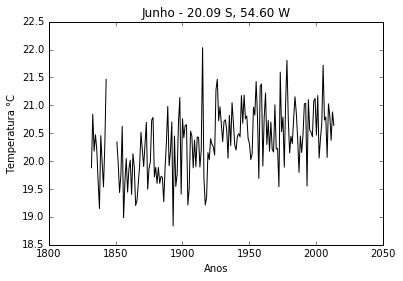

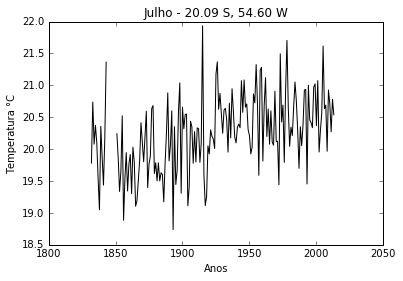

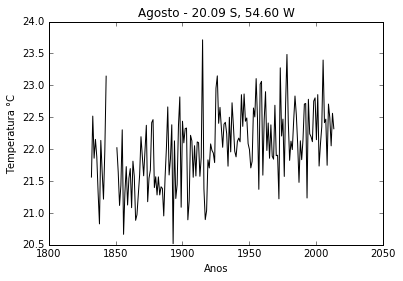

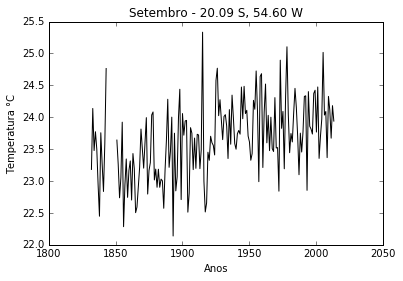

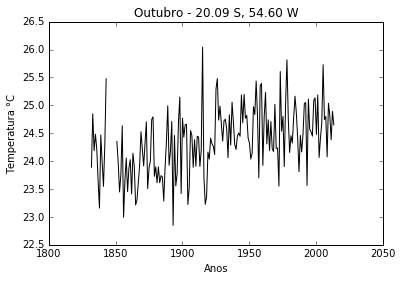

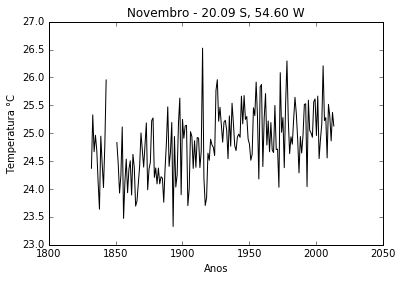

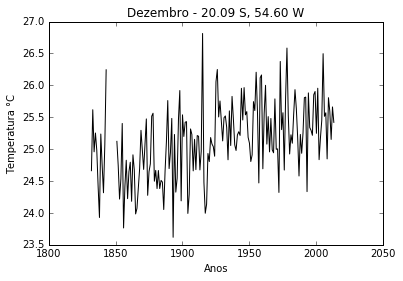

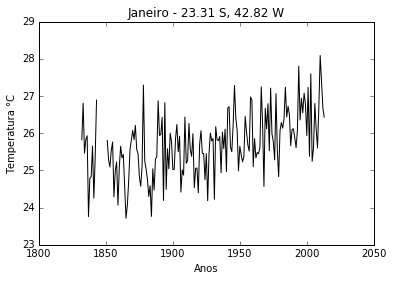

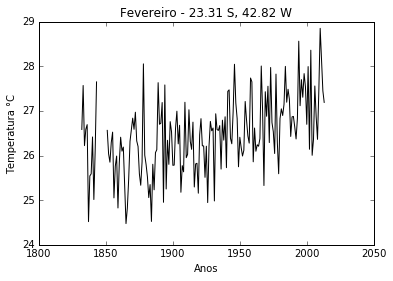

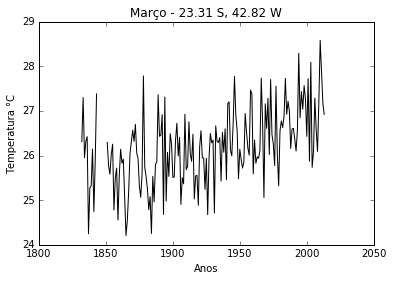

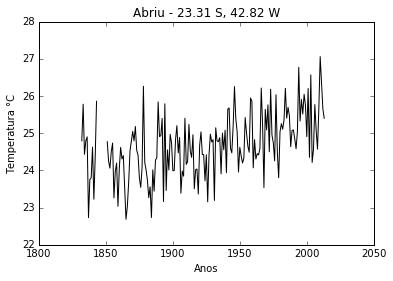

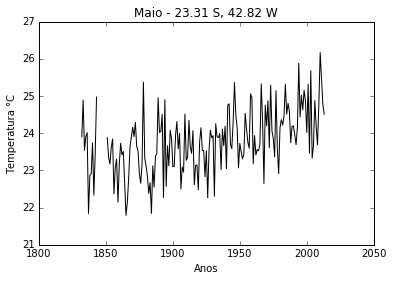

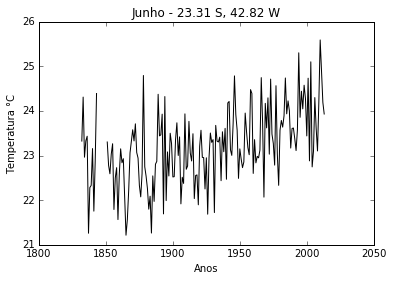

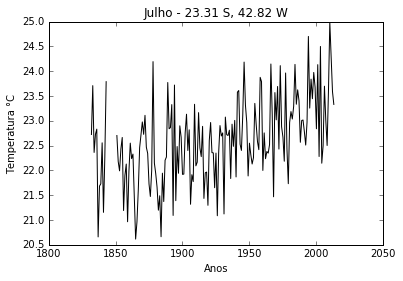

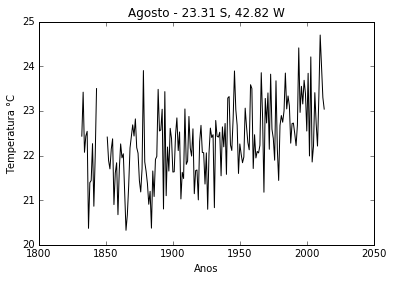

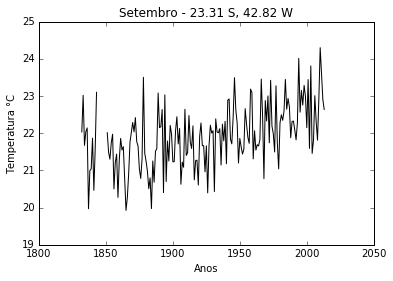

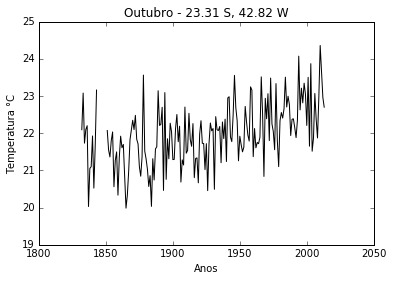

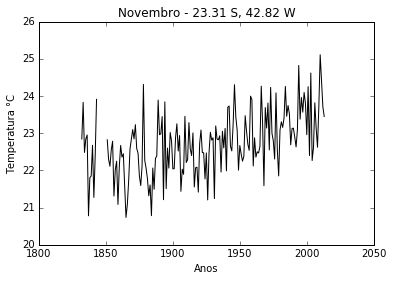

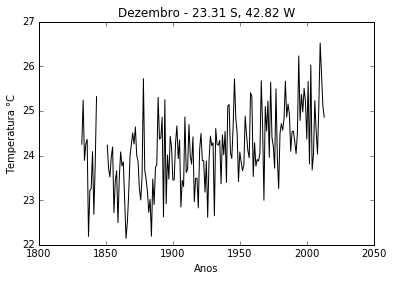

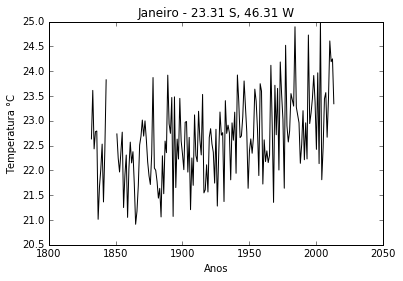

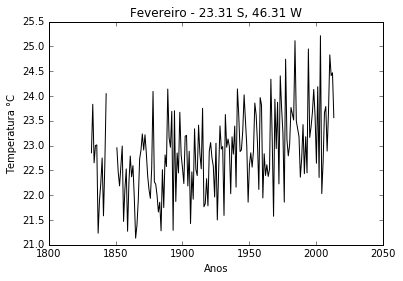

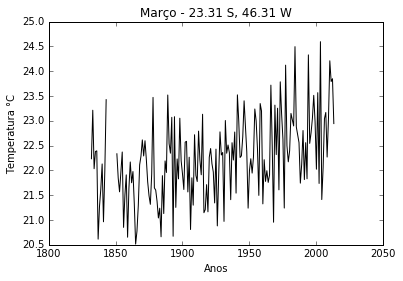

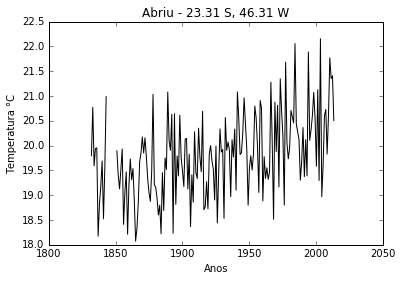

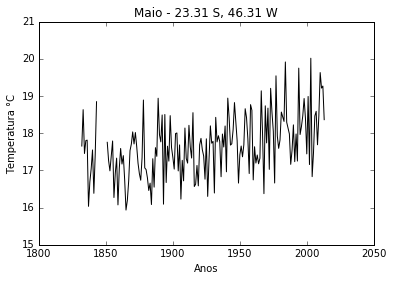

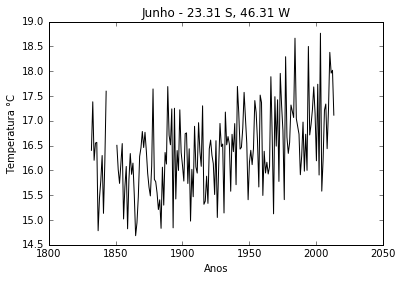

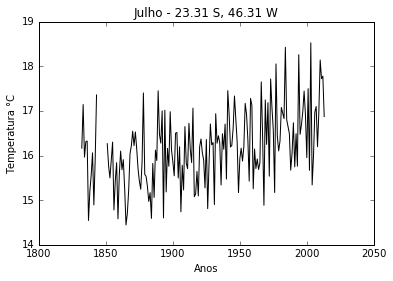

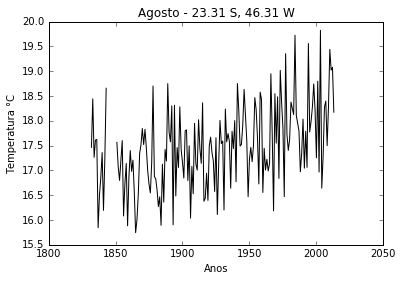

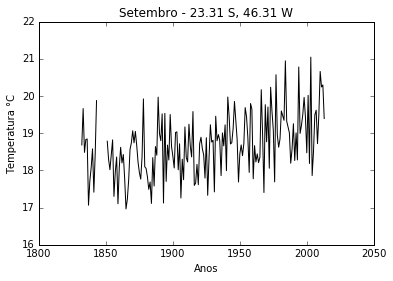

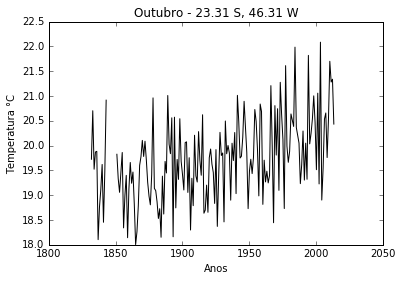

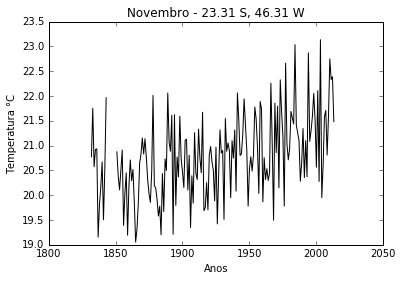

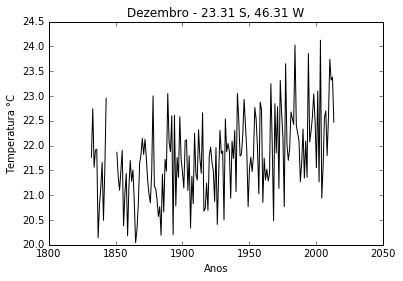

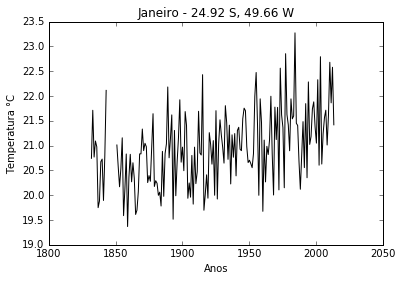

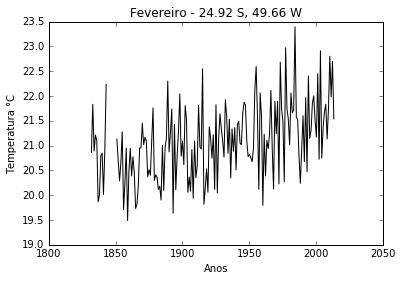

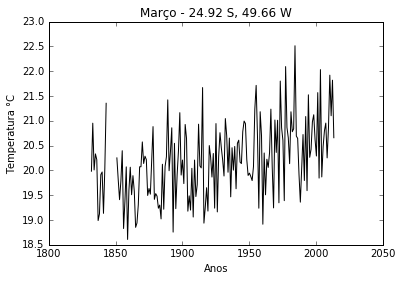

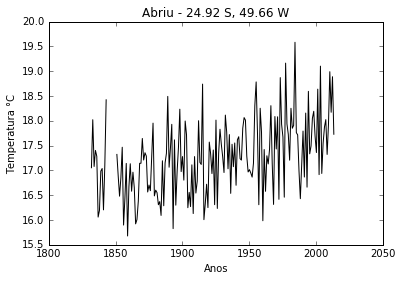

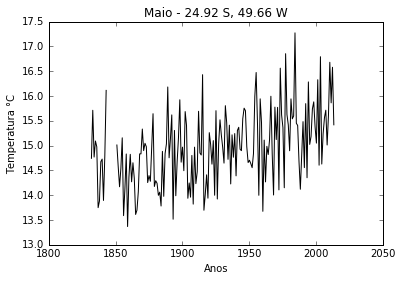

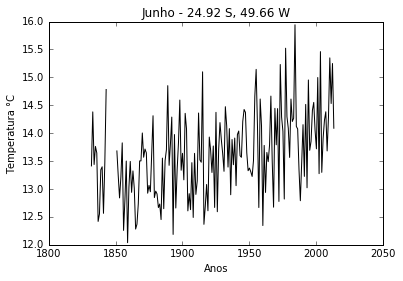

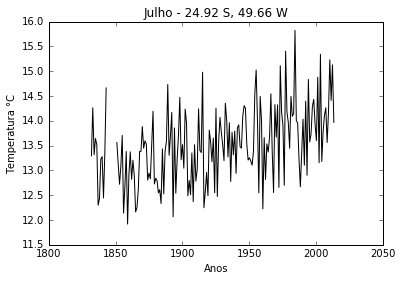

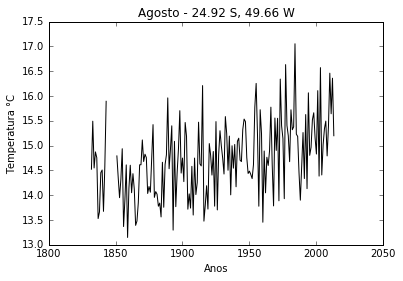

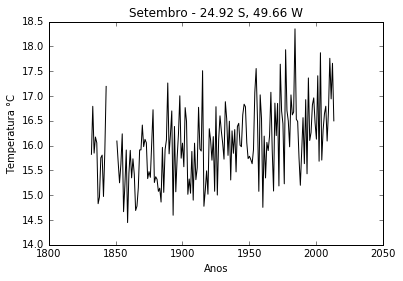

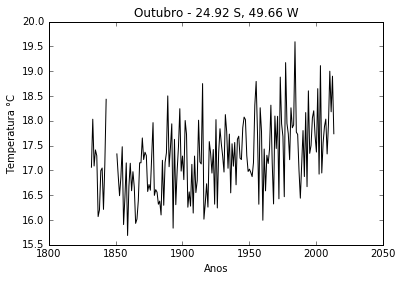

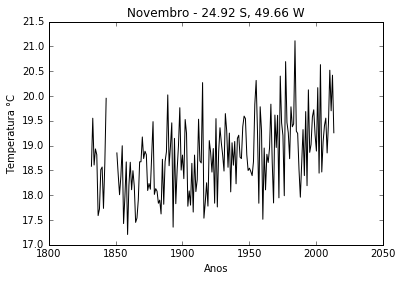

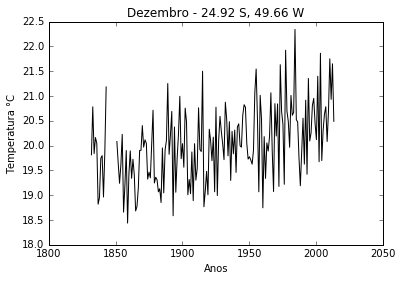

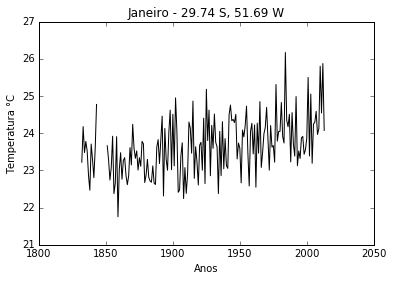

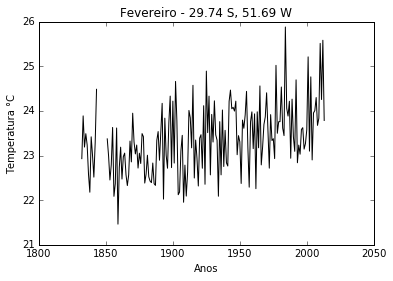

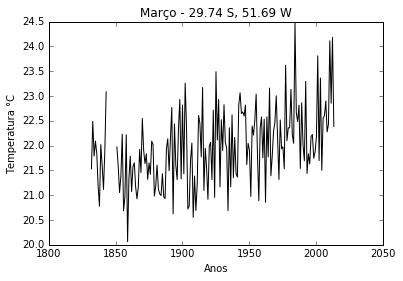

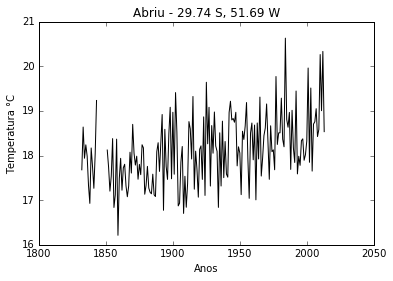

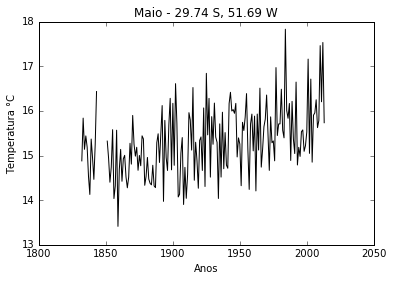

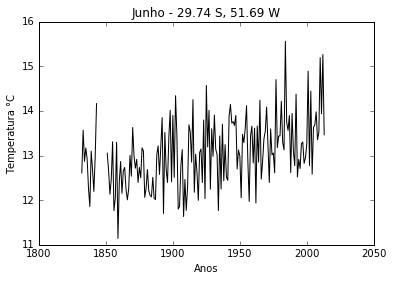

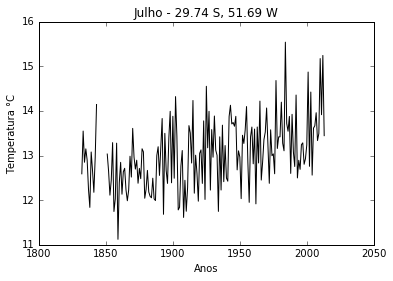

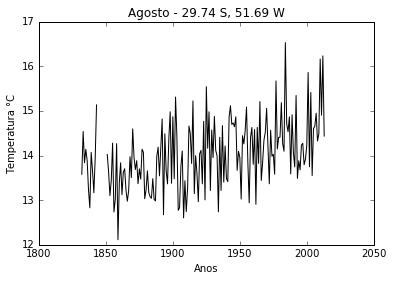

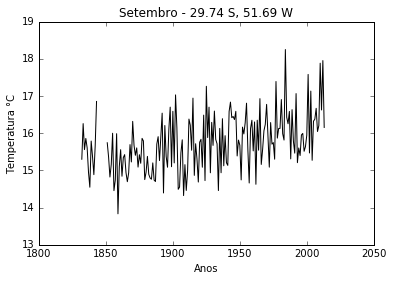

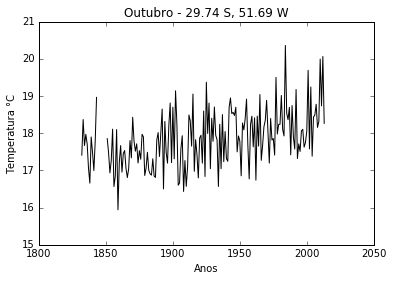

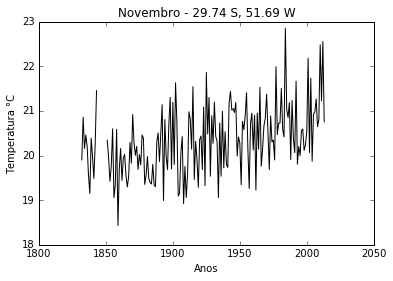

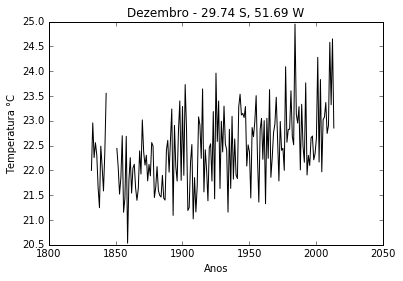

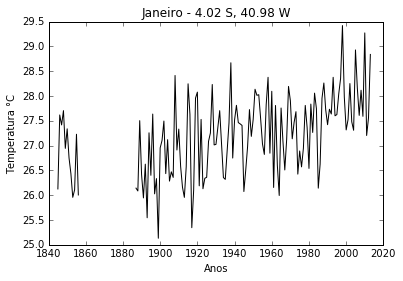

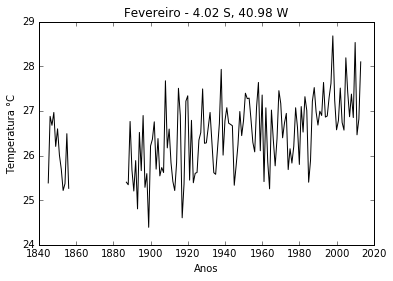

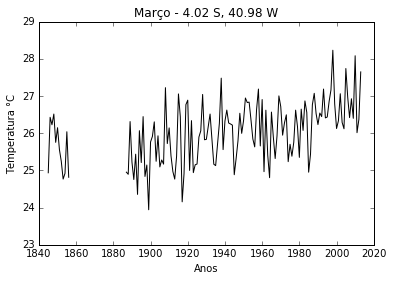

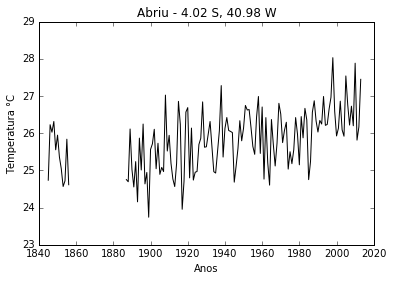

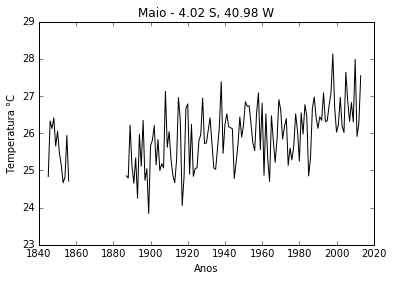

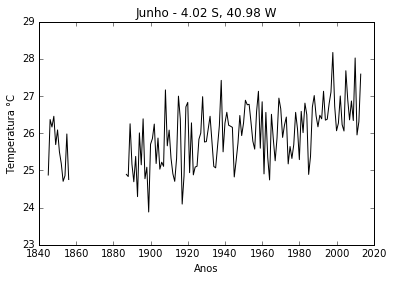

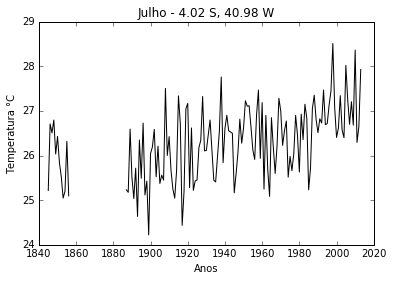

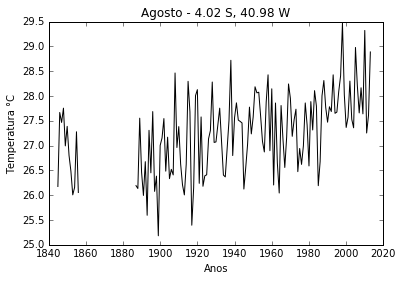

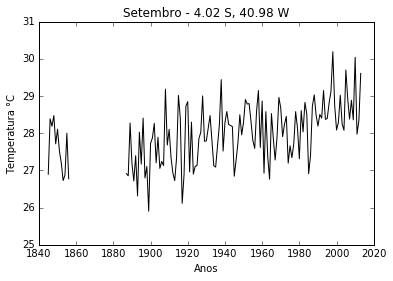

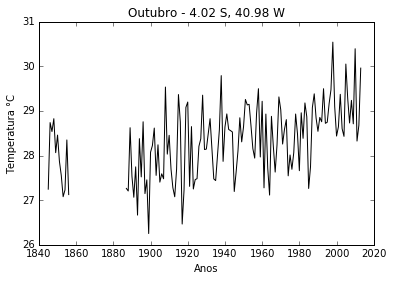

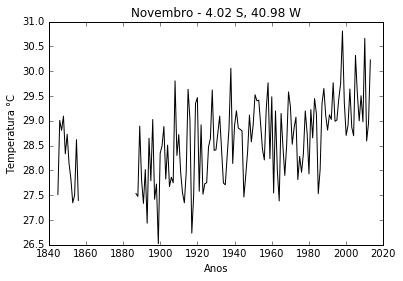

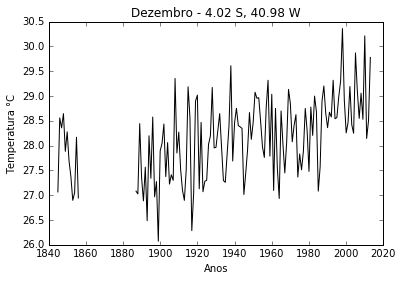

In [268]:
nome_arquivos = glob.glob("dados/*W-TAVG-Trend.txt")

    
for arquivo in nome_arquivos:
    
    meses = [1,2,3,4,5,6,7,8,9,10,11,12]
    anos = np.loadtxt(arquivo, comments = "%")[:,0][::12]
    
    for mes in meses:
        meses_ano = valores_do_mes(mes, arquivo)
        lat_long, city = localização(arquivo)
        
        if mes == 1:
            nome_mes = "Janeiro"
        elif mes == 2:
            nome_mes = "Fevereiro"
        elif mes == 3:
            nome_mes = "Março"
        elif mes == 4:
            nome_mes = "Abriu"
        elif mes == 5:
            nome_mes = "Maio"
        elif mes == 6:
            nome_mes = "Junho"
        elif mes == 7:
            nome_mes = "Julho"
        elif mes == 8:
            nome_mes = "Agosto"     
        elif mes == 9:
            nome_mes = "Setembro"
        elif mes == 10:
            nome_mes = "Outubro"
        elif mes == 11:
            nome_mes = "Novembro"
        else:
            nome_mes = "Dezembro"
        
        #Figura
        plt.figure()
    
        plt.plot (anos, meses_ano[0], c = "#000000")
        
        #Eixos
        plt.xlabel ("Anos")
        plt.ylabel ("Temperatura °C")
        plt.title (nome_mes + " - " + lat_long )
        
        plt.savefig ("bonus/" + nome_mes + " - " + city  + ".png", format = "png")